### Introduction

I'm using the "NBA Players data (1950 to 2022)" data set from Kaggle containing over 3000+ Players over 60+ Seasons, and 50+ features per player.

Goal:
Explore trends in NBA player stats, team performance over the years,player attributes over time, top scorers, Evolution on the game. etc.

Datasets: player_data.csv, season_stats.csv (from NBA Player data (1950–2022))



In [69]:
#importing all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#setting the desired output format.
%matplotlib inline
sns.set_style("whitegrid")

In [70]:
player_data = pd.read_csv("../data/player_data.csv", encoding='latin1')
season_stats = pd.read_csv("../data/seasons_stats.csv", encoding='latin1')
#Read both my data sets for Data viz and EDA.
player_data.head() #take a quick peak at the dataset.


Player  From    To  Pos    Ht     Wt       Birth Date  \
0        Alaa Abdelnaby  1991  1995  F-C  6-10  240.0     June 24 1968   
1       Zaid Abdul-Aziz  1969  1978  C-F   6-9  235.0     April 7 1946   
2  Kareem Abdul-Jabbar*  1970  1989    C   7-2  225.0    April 16 1947   
3    Mahmoud Abdul-Rauf  1991  2001    G   6-1  162.0     March 9 1969   
4     Tariq Abdul-Wahad  1998  2003    F   6-6  223.0  November 3 1974   

                  Colleges  
0                     Duke  
1               Iowa State  
2                     UCLA  
3                      LSU  
4  Michigan San Jose State

## Exploring the player data



In [71]:
display(player_data.info())
display(player_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4979 entries, 0 to 4978
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      4979 non-null   object 
 1   From        4979 non-null   int64  
 2   To          4979 non-null   int64  
 3   Pos         4979 non-null   object 
 4   Ht          4979 non-null   object 
 5   Wt          4974 non-null   float64
 6   Birth Date  4961 non-null   object 
 7   Colleges    4628 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 311.3+ KB


None

Player          0
From            0
To              0
Pos             0
Ht              0
Wt              5
Birth Date     18
Colleges      351
dtype: int64

In [72]:
player_data.describe()

From           To           Wt
count  4979.000000  4979.000000  4974.000000
mean   1988.461137  1992.666600   209.363088
std      22.410176    23.114979    26.005700
min    1947.000000  1947.000000   114.000000
25%    1971.000000  1975.000000   190.000000
50%    1990.000000  1996.000000   210.000000
75%    2008.000000  2014.000000   225.000000
max    2022.000000  2022.000000   360.000000

->The above commands Gives us the contents of the player dataset such as column names, notnull attribute and thier data types.

->Returns how many attributes in each column have null values. (useful for data cleaning)
>We found out that only Birth Date and Colleges of the players have missing values.


### Exploring the season_stats

In [73]:
display(season_stats.info())
display(season_stats.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28057 entries, 0 to 28056
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28057 non-null  int64  
 1   Year        28057 non-null  int64  
 2   Player      28057 non-null  object 
 3   Pos         28057 non-null  object 
 4   Age         28049 non-null  float64
 5   Tm          28057 non-null  object 
 6   G           28057 non-null  int64  
 7   GS          21666 non-null  float64
 8   MP          27571 non-null  float64
 9   FG          28057 non-null  int64  
 10  FGA         28057 non-null  int64  
 11  FG%         27942 non-null  float64
 12  3P          22360 non-null  float64
 13  3PA         22360 non-null  float64
 14  3P%         18632 non-null  float64
 15  2P          28057 non-null  int64  
 16  2PA         28057 non-null  int64  
 17  2P%         27878 non-null  float64
 18  eFG%        27942 non-null  float64
 19  FT          28057 non-nul

None

Unnamed: 0       0
Year             0
Player           0
Pos              0
Age              8
Tm               0
G                0
GS            6391
MP             486
FG               0
FGA              0
FG%            115
3P            5697
3PA           5697
3P%           9425
2P               0
2PA              0
2P%            179
eFG%           115
FT               0
FTA              0
FT%           1050
ORB           3827
DRB           3827
TRB            312
AST              0
STL           3827
BLK           3827
TOV           4979
PF               0
PTS              0
PER            523
TS%            102
3PAr          5801
FTr            115
ORB%          3832
DRB%          3832
TRB%          3053
AST%          2069
STL%          3832
BLK%          3832
TOV%          5056
USG%          4984
OWS             39
DWS             39
WS              39
WS/48          523
OBPM          3827
DBPM          3827
BPM           3827
VORP          3827
dtype: int64

In [74]:
season_stats.describe()

Unnamed: 0          Year           Age             G            GS  \
count  28057.000000  28057.000000  28049.000000  28057.000000  21666.000000   
mean   14073.925901   1995.951028     26.579343     49.487900     22.737053   
std     8117.684229     18.645457      3.880845     26.468388     27.996606   
min        0.000000   1950.000000     18.000000      1.000000      0.000000   
25%     7047.000000   1983.000000     24.000000     26.000000      0.000000   
50%    14077.000000   1999.000000     26.000000     55.000000      7.500000   
75%    21103.000000   2011.000000     29.000000     74.000000     42.000000   
max    28127.000000   2022.000000     44.000000     88.000000     83.000000   

                 MP            FG           FGA           FG%            3P  \
count  27571.000000  28057.000000  28057.000000  27942.000000  22360.000000   
mean    1170.531392    189.762270    417.734362      0.432147     25.520841   
std      924.724169    184.770145    390.794514      0.098335     41.792889   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      320.000000     39.000000     94.000000      0.393000      0.000000   
50%     1006.000000    135.000000    305.000000      0.439000      4.000000   
75%     1898.000000    289.000000    640.000000      0.481000     34.000000   
max     3882.000000   1597.000000   3159.000000      1.000000    402.000000   

       ...          TOV%          USG%           OWS           DWS  \
count  ...  23001.000000  23073.000000  28018.000000  28018.000000   
mean   ...     14.736359     18.839297      1.218367      1.186905   
std    ...      6.943126      5.486371      2.080259      1.236831   
min    ...      0.000000      0.000000     -5.100000     -1.000000   
25%    ...     11.000000     15.300000     -0.100000      0.200000   
50%    ...     13.900000     18.500000      0.400000      0.800000   
75%    ...     17.300000     22.100000      1.900000      1.800000   
max    ...    100.000000    100.000000     18.300000     16.000000   

                 WS         WS/48          OBPM          DBPM           BPM  \
count  28018.000000  27534.000000  24230.000000  24230.000000  24230.000000   
mean       2.406482      0.065775     -1.747243     -0.502361     -2.249542   
std        2.985314      0.104257      4.042371      2.227973      5.009469   
min       -2.800000     -2.519000    -73.800000    -31.100000    -86.700000   
25%        0.200000      0.031000     -3.400000     -1.600000     -4.100000   
50%        1.300000      0.076000     -1.500000     -0.500000     -1.800000   
75%        3.700000      0.115000      0.300000      0.700000      0.300000   
max       25.400000      2.712000    199.400000     46.800000    242.200000   

               VORP  
count  24230.000000  
mean       0.540673  
std        1.301751  
min       -2.600000  
25%       -0.200000  
50%        0.000000  
75%        0.800000  
max       12.400000  

[8 rows x 48 columns]

->The above commands Gives us the contents of the season_stats dataset such as column names, notnull attribute and thier data types.

->Returns how many attributes in each column have null values. (useful for data cleaning)

>We found out that quite a few season stats have missing values.

## Cleaning the data

In [75]:
#cleaning player_data
player_data = player_data.dropna(subset=['Wt'])
player_data["Colleges"]=player_data["Colleges"].fillna("None")
player_data=player_data.drop_duplicates()


Note:
>The N.B.A. introduced the 3-point shot in the 1979-80 season. So, 3PA, 3P, and 3P% are absent in older records. Acknowledge during EDA.

>Pre-1973: blocks/steals weren’t officially tracked

In [76]:
#cleaning season_stats
tiny_gaps=['Age','FG%',"2P%", "eFG%", "FT%", "TS%", "FTr", "WS", "DWS", "OWS", "WS/48"]
season_stats=season_stats.dropna(subset=tiny_gaps)
#keeping the remaining as NaN as they're era based stats or advanced stats
season_stats = season_stats.drop(columns=["Unnamed: 0"])
season_stats=season_stats.drop_duplicates()


## Exploring the clean data

In [77]:
display(season_stats.info())
display(season_stats.isnull().sum())
season_stats.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 26455 entries, 486 to 28056
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    26455 non-null  int64  
 1   Player  26455 non-null  object 
 2   Pos     26455 non-null  object 
 3   Age     26455 non-null  float64
 4   Tm      26455 non-null  object 
 5   G       26455 non-null  int64  
 6   GS      20718 non-null  float64
 7   MP      26455 non-null  float64
 8   FG      26455 non-null  int64  
 9   FGA     26455 non-null  int64  
 10  FG%     26455 non-null  float64
 11  3P      21393 non-null  float64
 12  3PA     21393 non-null  float64
 13  3P%     18182 non-null  float64
 14  2P      26455 non-null  int64  
 15  2PA     26455 non-null  int64  
 16  2P%     26455 non-null  float64
 17  eFG%    26455 non-null  float64
 18  FT      26455 non-null  int64  
 19  FTA     26455 non-null  int64  
 20  FT%     26455 non-null  float64
 21  ORB     23216 non-null  float64
 22  D

None

Year         0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS        5737
MP           0
FG           0
FGA          0
FG%          0
3P        5062
3PA       5062
3P%       8273
2P           0
2PA          0
2P%          0
eFG%         0
FT           0
FTA          0
FT%          0
ORB       3239
DRB       3239
TRB          0
AST          0
STL       3239
BLK       3239
TOV       4367
PF           0
PTS          0
PER          0
TS%          0
3PAr      5062
FTr          0
ORB%      3239
DRB%      3239
TRB%      2477
AST%      1510
STL%      3239
BLK%      3239
TOV%      4367
USG%      4367
OWS          0
DWS          0
WS           0
WS/48        0
OBPM      3239
DBPM      3239
BPM       3239
VORP      3239
dtype: int64

Year           Age             G            GS            MP  \
count  26455.000000  26455.000000  26455.000000  20718.000000  26455.000000   
mean    1996.605254     26.607106     51.452844     23.774158   1217.511586   
std       17.793260      3.894806     25.385795     28.197271    913.583385   
min     1952.000000     18.000000      1.000000      0.000000      2.000000   
25%     1984.000000     24.000000     29.000000      0.000000    386.000000   
50%     1999.000000     26.000000     57.000000      9.000000   1071.000000   
75%     2012.000000     29.000000     75.000000     45.000000   1940.000000   
max     2022.000000     44.000000     88.000000     83.000000   3882.000000   

                 FG           FGA           FG%            3P           3PA  \
count  26455.000000  26455.000000  26455.000000  21393.000000  21393.000000   
mean     198.732981    435.706445      0.438224     26.644183     75.648016   
std      185.386314    391.091722      0.083420     42.382338    112.089612   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%       48.000000    113.000000      0.400000      0.000000      2.000000   
50%      145.000000    328.000000      0.441000      5.000000     19.000000   
75%      301.000000    661.000000      0.482000     37.000000    110.000000   
max     1597.000000   3159.000000      1.000000    402.000000   1028.000000   

       ...          TOV%          USG%           OWS           DWS  \
count  ...  22088.000000  22088.000000  26455.000000  26455.000000   
mean   ...     14.548556     18.923719      1.274682      1.236689   
std    ...      5.517210      5.103670      2.098514      1.238092   
min    ...      0.000000      3.000000     -5.100000     -1.000000   
25%    ...     11.100000     15.400000      0.000000      0.300000   
50%    ...     13.900000     18.600000      0.500000      0.900000   
75%    ...     17.200000     22.100000      2.000000      1.800000   
max    ...     68.000000     69.200000     18.300000     16.000000   

                 WS         WS/48          OBPM          DBPM           BPM  \
count  26455.000000  26455.000000  23216.000000  23216.000000  23216.000000   
mean       2.512311      0.071913     -1.499918     -0.422446     -1.922312   
std        3.001401      0.079731      3.137062      1.926551      3.911570   
min       -2.800000     -0.795000    -25.500000    -30.400000    -38.400000   
25%        0.300000      0.035000     -3.125000     -1.500000     -3.800000   
50%        1.500000      0.078000     -1.400000     -0.400000     -1.600000   
75%        3.800000      0.116000      0.400000      0.700000      0.400000   
max       25.400000      1.384000     31.700000     10.100000     34.800000   

               VORP  
count  23216.000000  
mean       0.565696  
std        1.324182  
min       -2.600000  
25%       -0.200000  
50%        0.000000  
75%        0.900000  
max       12.400000  

[8 rows x 47 columns]

In [78]:
display(player_data.info())
display(player_data.isnull().sum())
player_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4865 entries, 0 to 4978
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      4865 non-null   object 
 1   From        4865 non-null   int64  
 2   To          4865 non-null   int64  
 3   Pos         4865 non-null   object 
 4   Ht          4865 non-null   object 
 5   Wt          4865 non-null   float64
 6   Birth Date  4848 non-null   object 
 7   Colleges    4865 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 342.1+ KB


None

Player         0
From           0
To             0
Pos            0
Ht             0
Wt             0
Birth Date    17
Colleges       0
dtype: int64

From           To           Wt
count  4865.000000  4865.000000  4865.000000
mean   1988.490031  1992.698047   209.334841
std      22.405998    23.110208    25.969909
min    1947.000000  1947.000000   114.000000
25%    1971.000000  1975.000000   190.000000
50%    1990.000000  1996.000000   210.000000
75%    2008.000000  2014.000000   225.000000
max    2022.000000  2022.000000   360.000000

## **ANALYSIS and VISUALIZATION** 

*Question 1*: Who are the top 10 scorers in NBA history?                                                 
To find the players with the highest points in their entire career.

In [79]:
top_scorers = season_stats.groupby("Player")['PTS'].sum().sort_values(ascending=False).head(10)
top_scorers_df = top_scorers.reset_index()
top_scorers_df.columns = ["Player", "Total Points"]
top_scorers_df



Player  Total Points
0  Kareem Abdul-Jabbar*         38387
1          Karl Malone*         36928
2          LeBron James         36493
3     Wilt Chamberlain*         33953
4           Kobe Bryant         33643
5       Michael Jordan*         32292
6         Eddie Johnson         31840
7         Dirk Nowitzki         31560
8       Carmelo Anthony         30264
9     Shaquille O'Neal*         29428

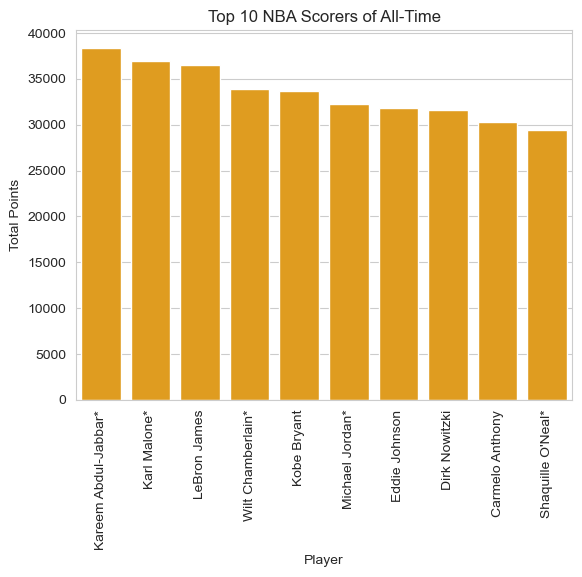

In [80]:

sns.barplot(x='Player', y='Total Points', data=top_scorers_df, color="orange")
plt.xticks(rotation=90)
plt.title("Top 10 NBA Scorers of All-Time")
plt.show()



*Question 2*: Which players played the most seasons in the NBA?

Useful to find the Player Career Longevity.

In [81]:
career_length = season_stats.groupby("Player")["Year"].nunique().sort_values(ascending=False).head(10)

career_length_df = career_length.reset_index()
career_length_df.columns = ["Player", "Seasons Played"]

career_length_df


Player  Seasons Played
0         Mike Dunleavy              25
1          Vince Carter              22
2      Gerald Henderson              21
3          Kevin Willis              21
4        Robert Parish*              21
5         Dirk Nowitzki              21
6         Kevin Garnett              21
7            John Lucas              20
8           Kobe Bryant              20
9  Kareem Abdul-Jabbar*              20

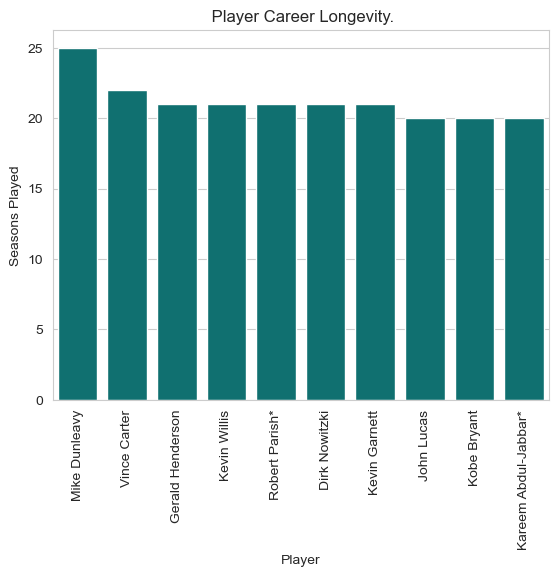

In [82]:

sns.barplot(x='Player', y='Seasons Played', data=career_length_df, color="teal")
plt.xticks(rotation=90)
plt.title(" Player Career Longevity.")
plt.show()


**Question 3:**

Average points per game over decades (trend).                            
How has the average points per game (PPG) changed since 1950?

In [83]:
season_stats['PPG']= season_stats['PTS']/season_stats['G']
season_stats['Decade']=(season_stats['Year']//10)*10
avg_ppg= season_stats.groupby('Decade')["PPG"].mean().reset_index()

avg_ppg

Decade        PPG
0    1950   8.557279
1    1960  10.402054
2    1970   9.537875
3    1980   9.100446
4    1990   8.302366
5    2000   8.030068
6    2010   8.225196
7    2020   8.913569

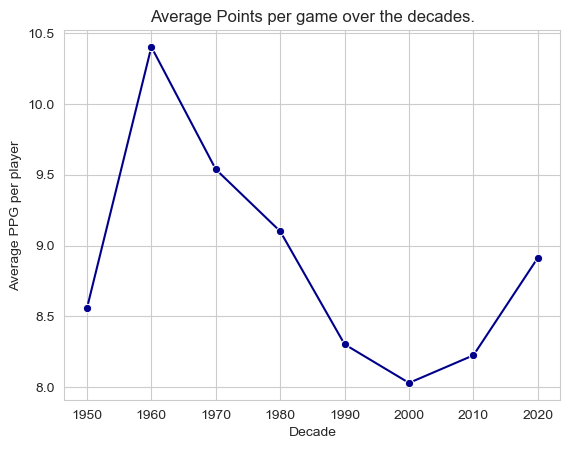

In [84]:

sns.lineplot(data=avg_ppg, x="Decade", y="PPG", marker="o", color="darkblue")
plt.title("Average Points per game over the decades.")
plt.xticks(avg_ppg["Decade"])
plt.xlabel("Decade")
plt.ylabel("Average PPG per player")
plt.show()




In [85]:
import plotly.express as px


fig = px.line(
    avg_ppg, 
    x='Decade', 
    y='PPG', 
    markers=True, 
    title='Average Points per Game per player over the Decades'
)

fig.update_traces(line_color='darkblue', marker=dict(size=10))
fig.update_layout(
    xaxis_title='Decade',
    yaxis_title='Average PPG per player'
)

fig.show()


*Insights:*
>1960s: Highest PPG per player. likely due to the faster pace of the game and lots of shot attempts.

>Dip in the 70s to the 2000s, despite Magic/Bird and Jordan eras, this could indicate more balanced team scoring or a trend toward team-oriented defense.

>2010s to Present: modern era scoring is picking up due to the fast pace nature of the game and the Evolution of the 3 point shot.

**Question 4:**   Evolution of 3-point shooting (trend)

How has 3-point shooting evolved over time?


In [86]:
season_stats['3PA']=season_stats['3PA'].fillna(0)
season_stats['3PA_per_game']=season_stats['3PA']/season_stats['G']
avg_3pa_peryear=season_stats.groupby('Year')['3PA_per_game'].mean().reset_index()
avg_3pa_peryear

Year  3PA_per_game
0   1952      0.000000
1   1953      0.000000
2   1954      0.000000
3   1955      0.000000
4   1956      0.000000
..   ...           ...
66  2018      2.367326
67  2019      2.672615
68  2020      2.788839
69  2021      2.795423
70  2022      2.795423

[71 rows x 2 columns]

In [87]:
import plotly.express as px

fig = px.line(
    avg_3pa_peryear,
    x='Year',
    y='3PA_per_game',       
    markers=True,
    title='Evolution of 3-Point Attempts Per Player Per Game in the NBA'
)

fig.update_traces(line_color='darkblue', marker=dict(size=6))
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average 3-Point Attempts per Player',
    
)

fig.show()


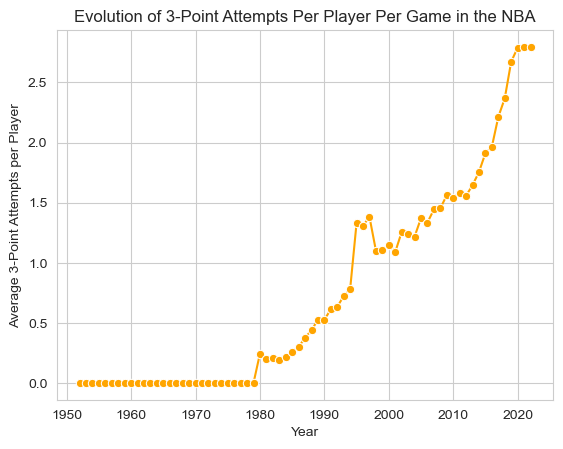

In [88]:
sns.lineplot(avg_3pa_peryear,x='Year',y='3PA_per_game',marker='o',color='orange')
plt.title("Evolution of 3-Point Attempts Per Player Per Game in the NBA")

plt.xlabel("Year")
plt.ylabel("Average 3-Point Attempts per Player")
plt.show()

*Insights:*
The 3-point shot was introducted into the NBA in the 1979-80 season.

>Adoption of the 3P shot was slow through the 80s and 1990s, with only a few players attempting threes regularly.

>The 2000s saw a steady growth in the 3P shot as coaches recognized the value of it.

>The 2010s to 20s saw a massive spike in 3 Point shots attempted as scoring efficiency of many shooters has improved drastically and due to advanced analytics.
>One such shooter is Steph Curry, vastly regarded as the greatest shooter to ever play basketball.

>The 3 Point shot today is a core part of NBA offenses and the game flow.

**Question 5:**

How does Steph Curry (widely regarded as the greatest shooter) compare to the league average in % of 3Pointers made?


In [89]:
season_stats['3P%'] = season_stats['3P%'].fillna(0)
season_stats['3P%'] = season_stats['3P%'] * 100


league_avg_3Ppct = season_stats.groupby('Year')['3P%'].mean().reset_index()
league_avg_3Ppct.columns = ['Year', 'League_Avg_3P%']


curry_3Ppct = season_stats[season_stats['Player'] == 'Stephen Curry'].groupby('Year')['3P%'].mean().reset_index()
curry_3Ppct.columns = ['Year', 'Curry_3P%']

compare_pct_df = league_avg_3Ppct.merge(curry_3Ppct, on='Year', how='left')
#merging both the data frames to compare them..

In [90]:


fig = px.line(
    compare_pct_df,
    x='Year',
    y=['League_Avg_3P%', 'Curry_3P%'],
    markers=True,
    title="Steph Curry vs League Average: 3-Point Percentage"
)

fig.update_traces(marker=dict(size=6))
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="3-Point Percentage",
    legend_title_text='Player',
    template='plotly_white'
)

fig.show()



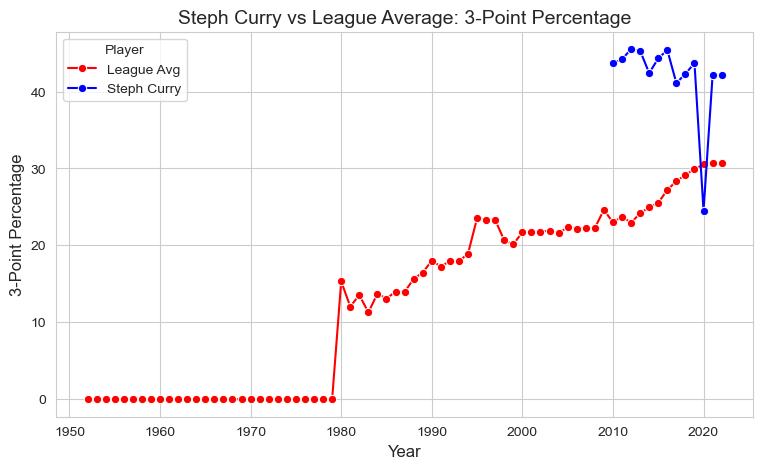

In [91]:

sns.set_style("whitegrid")

plt.figure(figsize=(9,5))

sns.lineplot(compare_pct_df,x='Year',y='League_Avg_3P%',marker='o',label='League Avg',color='red')

sns.lineplot(compare_pct_df,x='Year',y='Curry_3P%',marker='o',label='Steph Curry',color='blue')


plt.title("Steph Curry vs League Average: 3-Point Percentage", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("3-Point Percentage", fontsize=12)

plt.legend(title='Player')

plt.show()


*Insights:*

The above data visualization shows the sheer dominance of Steph Curry from the 3 Point range when compared to the league average.

Steph Curry has consistently outperformed the league’s 3-point percentage by nearly double since entering the NBA.(except in 2020 where he suffered an injury(Covid))


The gap between Curry and the league average highlights not just his efficiency but also how far ahead he was in redefining 3-point shooting.






**Question 6:**

Who are the most versatile players in the league?

The players with the Highest Points, Rebounds and Assists per game.

In [92]:
season_stats['PTS'] = season_stats['PTS'].fillna(0)
season_stats['TRB'] = season_stats['TRB'].fillna(0)
season_stats['AST'] = season_stats['AST'].fillna(0)
season_stats['G']   = season_stats['G'].replace(0, 1)  # to avoid 0 division erorr

season_stats['ppg']=season_stats['PTS']/season_stats['G']#points per game
season_stats['rpg']=season_stats['TRB']/season_stats['G']#rebounds per game
season_stats['apg']=season_stats['AST']/season_stats['G']# assists per game.

career_stats=season_stats.groupby('Player')[["ppg","rpg","apg"]].mean().reset_index()

In [93]:
career_stats["Versatility"] = career_stats["ppg"] + career_stats["rpg"] + career_stats["apg"]

In [94]:
top_v=career_stats.sort_values("Versatility",ascending=False).head(10)
top_v

Player        ppg        rpg       apg  Versatility
4029  Wilt Chamberlain*  30.646578  22.704842  4.270160    57.621580
2962       Nikola Joki?  26.361111  10.833333  8.319444    45.513889
391         Bob Pettit*  26.177270  16.098956  2.964709    45.240936
2563        Luka Don?i?  27.727273   7.984848  8.590909    44.303030
3011   Oscar Robertson*  25.526368   7.421743  9.451219    42.399330
2564      Luka DonÄiÄ  25.919261   8.399245  7.789638    42.108144
1271      Elgin Baylor*  25.275389  12.598368  3.945709    41.819466
2482       LeBron James  26.836718   7.480484  7.452015    41.769216
314       Bill Russell*  15.114927  22.383754  4.159804    41.658485
2778    Michael Jordan*  29.444797   6.112847  5.139372    40.697016

In [95]:
top_v_m = top_v.melt(id_vars="Player", value_vars=["ppg","rpg","apg"], 
                          var_name="Stat", value_name="Value")


fig = px.bar(
    top_v_m,
    x="Player",
    y="Value",
    color="Stat",
    barmode="group",
    title="Most Versatile Players "
)
fig.show()

fig = px.imshow(
    top_v.set_index("Player")[["ppg","rpg","apg"]],
    color_continuous_scale="Blues",
    title="Versatility Heatmap (PPG, RPG, APG)"
)
fig.show()


C:\Users\dnikh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 141 (\x8d) missing from font(s) Arial.

C:\Users\dnikh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 135 (\x87) missing from font(s) Arial.



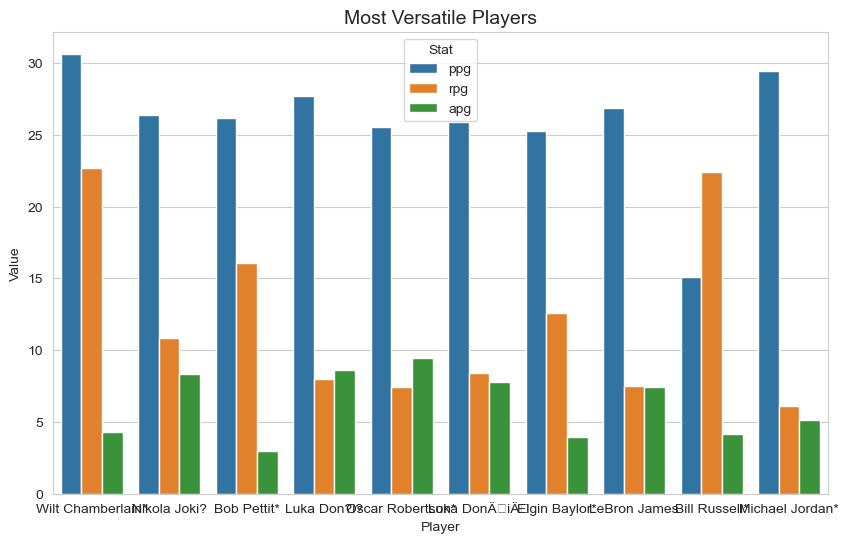

In [96]:

plt.figure(figsize=(10,6))
sns.barplot(data=top_v_m, x="Player", y="Value", hue="Stat")

plt.title("Most Versatile Players", fontsize=14)
plt.xlabel("Player")
plt.ylabel("Value")
plt.legend(title="Stat")

plt.show()


*Insights:*

A versatile player is a big positive asset to any team.
Only a few players consistently excel at scoring, rebounding, and assists, making them true allround stars.

Scoring legends(Players with very high PPG) such as Kobe or KD often rank lower in versatility compared to players who are balanced all three categories.

**Question 7**

Do taller players rebound more on average?

Do the Big Men Dominate?: Height vs Rebounding Correlation

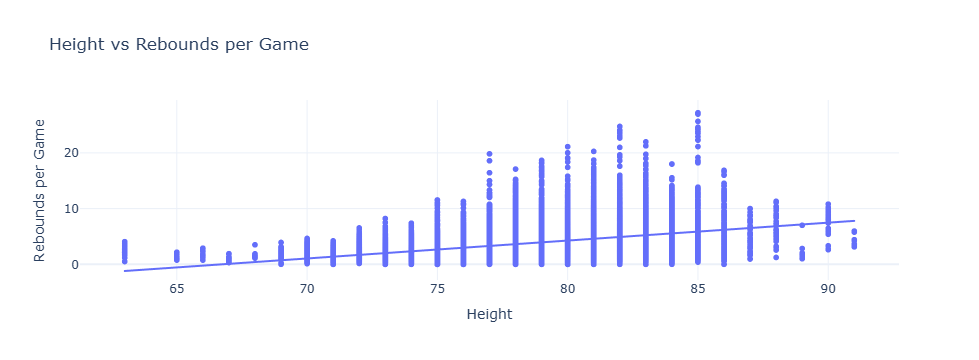

In [97]:

def height_to_inches(ht):
    try:
        feet, inches = ht.split('-')
        return int(feet) * 12 + int(inches)
    except:
        return None
#converting the height into an int, because the dataset stores height as a string.

player_data['Ht_in'] = player_data['Ht'].apply(height_to_inches)
player_data_clean = player_data.dropna(subset=['Ht_in'])

season_stats['TRB'] = season_stats['TRB'].fillna(0)
season_stats['G'] = season_stats['G'].replace(0,1)
season_stats['RPG'] = season_stats['TRB'] / season_stats['G']

height_stats = season_stats.merge(player_data_clean[['Player','Ht_in']], on='Player', how='left')
height_stats = height_stats.dropna(subset=['Ht_in'])



fig = px.scatter(
    height_stats,
    x='Ht_in',
    y='RPG',
    hover_data=['Player', 'Year'],
    trendline='ols',  
    title="Height vs Rebounds per Game"
)

fig.update_layout(
    xaxis_title="Height",
    yaxis_title="Rebounds per Game",
    template="plotly_white"
)

fig.show()


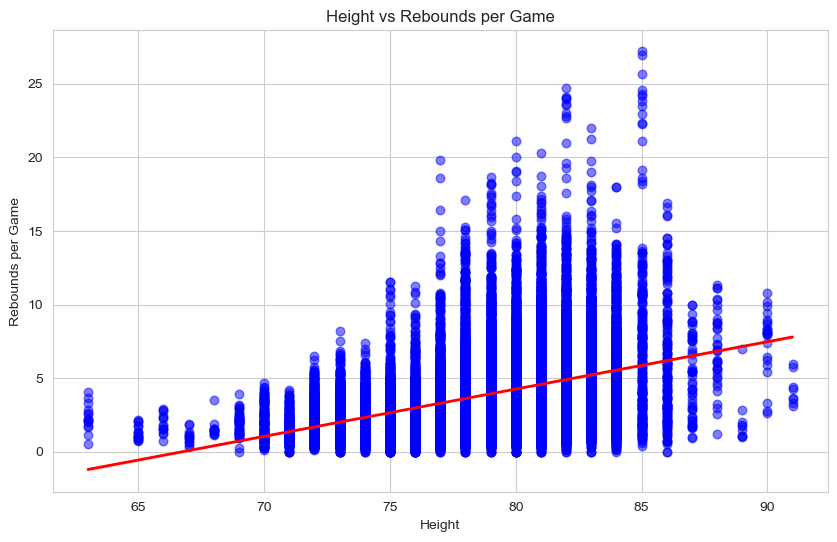

In [98]:
plt.figure(figsize=(10,6))
sns.regplot(height_stats,x='Ht_in',y='RPG',scatter=True,color='blue',marker='o', line_kws={'color': 'red', 'linewidth': 2}, scatter_kws={'s': 38, 'alpha': 0.5})

plt.title("Height vs Rebounds per Game")
plt.xlabel("Height")
plt.ylabel("Rebounds per Game")
plt.show()

*Insights:* 

Our general assumption is correct. Taller players generally do grab more rebounds per game, confirming the expected positive relationship between height and rebounding.

We can observe from out plot that players in the 78-86 inch height range grab the most rebounds.

There are a few exceptions, some shorter players still have high RPG, showing that skill, positioning, and playing time also matter.

### Conclusion

Thanks for following along with this NBA stats journey! From all-time scoring leaders to 3-point trends, versatile stars, and the role of height in rebounding, we’ve uncovered how the game has evolved and what makes players shine. Hope you enjoyed exploring the stats and plots as much as I did!

Thank you.